#**Design Optimization Homework 4**

##Question 1:-



Solution is x=(1.0604169033539967,1.4563356389457212)


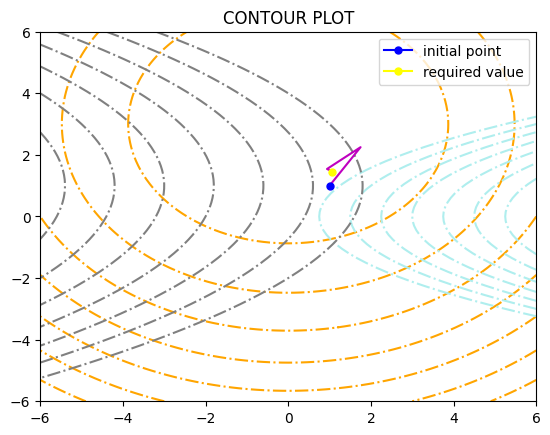

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import copy
def f_(x):
    f = x[0][0] ** 2 + (x[1][0] - 3) ** 2
    return f
def derivative_f(x):
    derivative_f = np.array([[2 * x[0][0], 2 * (x[1][0] - 3)]])
    return  derivative_f
def derivative_g(x):
    derivative_g = np.array([[-2, 2 * x[1][0]],[5, 2 * (x[1][0] - 1)]])
    return derivative_g
def g_(x):
    g = np.array([[x[1][0] ** 2 - 2 * x[0][0]],[(x[1][0] - 1) ** 2 + 5 * x[0][0] - 15]])
    return g
def l_s(x, v1, m_u, lz, i1):
    t = 0.3
    a1 = 1
    if i1 == 0:
        z = abs(m_u)
    else:
        z = np.zeros((2, 1))
        z[0] = max(abs(m_u[0]), 0.5 * (lz[0] + abs(m_u[0])))
        z[1] = max(abs(m_u[1]), 0.5 * (lz[1] + abs(m_u[1])))

    dgda1 = 0 if g_(x)[0, :] <= 0 else np.matmul(d_g(x)[0, :], v1)
    dgda2 = 0 if g_(x)[1, :] <= 0 else np.matmul(d_g(x)[1, :], v1)
    dFda = np.matmul(d_f(x), v1) + (z[0, :] * dgda1 + z[1, :] * dgda2)
    def F_a(x, z, a1, v1):
        g_1 = max(0, g_(x + a1*v1)[0, :])
        g_2 = max(0, g_(x + a1*v1)[1, :])
        F = f_(x + a1*v1) + (z[0, :] * g_1 + z[1, :] * g_2)
        return F
    p1 = lambda x, z, a1, t, dFda: F_a(x, z, 0, 0) + a1 * t * dFda
    while p1(x, z, a1, t, dFda) < F_a(x, z, a1, v1):
        a1 = 0.8 * a1
    return a1, z
def sqp_s(x, w):
    A_0 = d_g(x)
    b_0 = g_(x)
    m_u0 = np.zeros((b_0.shape[0], 1))
    m_u = []
    a_t = []
    while True:
        if len(a_t) == 0:
            m = w
            v1_mu = np.matmul(np.linalg.inv(m), -d_f(x).T)
            v1 = v1_mu[:2, :]
            m_u = []
        if len(a_t) != 0:
            if len(a_t) == 1:
                A = A_0[a_t[0], :].reshape(1, -1)
                b = b_0[a_t[0], :]
            if len(a_t) == 2:
                A = copy.deepcopy(A_0)
                b = copy.deepcopy(b_0)
            m = np.vstack((np.hstack((w, A.T)),
                                np.hstack((A, np.zeros((A.shape[0], A.shape[0]))))))
            v1_mu = np.matmul(np.linalg.inv(m), np.vstack((-d_f(x).T, -b)))
            v1 = v1_mu[:2, :]
            m_u = v1_mu[2:, :]
            if len(m_u) == 1:
                m_u0[0] = v1_mu[2:3, :]
            if len(m_u) == 2:
                m_u0[0] = v1_mu[2:3, :]
                m_u0[1] = v13_mu[3:, :]
        sqp_c = np.round((np.matmul(A_0, v1.reshape(-1, 1)) + b_0))
        m_u_c = 0
        if len(m_u) == 0:
            m_u_c = 1
        elif min(m_u) > 0:
            m_u_c = 1
        else:
            id_m_u = np.argmin(np.array(m_u))
            m_u.remove(min(m_u))
            active.pop(id_m_u)
        if np.max(sqp_c) <= 0:
            if m_u_c == 1:
                return v1, m_u0
        else:
            index = np.argmax(sqp_c)
            a_t.append(index)
            a_t = np.unique(np.array(a_t)).tolist()
def BFGS(w, x, dx, v1, m_u):
    d_l = (d_f(x) + np.matmul(m_u.T, d_g(x))) - (d_f(x - dx) + np.matmul(m_u.T, d_g(x - dx)))
    q1 = np.matmul(np.matmul(dx.T, w), dx)
    if np.matmul((dx).T, d_l.T) >= 0.2 * np.matmul(np.matmul((dx).T, w), (dx)):
        tt = 1
    else:
        tt = 0.8 * q1 / (q1 - np.matmul(dx.T, d_l.T))
    y = tt * d_l.T + (1 - tt) * np.matmul(w, dx)
    wn = w + np.matmul(y, y.T) / np.matmul(y.T, v1) - np.matmul(np.matmul(w, v1), np.matmul(v1.T, w)) / np.matmul(np.matmul(v1.T, w), v1)
    return wn
ep = 1e-3
x_0 = np.array([[1.], [1.]])
x = np.array([[1.], [1.]])
w = np.eye(x.shape[0])
m_uo = np.zeros((x.shape[0], 1))
i1 = 0
dln = np.linalg.norm(d_f(x) + np.matmul(m_uo.T, d_g(x)))
wo = np.zeros((2, 1))
s_1 = []
s_2 = []
s_1.append(x[0][0])
s_2.append(x[1][0])
while dln > ep:
    v1, m_un = sqp_s(x, w)
    a1, wn = l_s(x, v1, m_uo, wo, i1)
    wo = wn
    dx = a1*v1
    x += dx
    w = BFGS(w, x, dx, v1, m_un)
    i1 += 1
    dln = np.linalg.norm(d_f(x) + np.matmul(m_un.T, d_g(x)))
    m_uo = m_un
    s_1.append(x[0][0])
    s_2.append(x[1][0])
X_1 = np.linspace(-6, 6, 81)
X_2 = np.linspace(-6, 6, 81)
x_1, x_2 = np.meshgrid(X_1, X_2)
F = np.array([x_1 ** 2 + (x_2 - 3) ** 2 for x_2 in X_2 for x_1 in X_1]).reshape(x_1.shape)
r_1 = np.array([-2 * x_1 + x_2 ** 2 for x_2 in X_2 for x_1 in X_1]).reshape(x_1.shape)
r_2 = np.array([5 * x_1 + (x_2 - 1) ** 2 - 15 for x_2 in X_2 for x_1 in X_1]).reshape(x_1.shape)
r_1[np.where(r_1 > 0)] = None
r_2[np.where(r_2 > 0)] = None
print('Solution is x=({},{})'.format(s_1[-1], s_2[-1]))
plt.contour(x_1, x_2, F, colors='orange',linestyles='dashdot')
plt.contour(x_1, x_2, r_1, colors='#afeeee',linestyles='dashdot')
plt.contour(x_1, x_2, r_2, colors='gray',linestyles='dashdot')
plt.plot(s_1, s_2, c='m')
plt.plot(x_0[0], x_0[1], c='blue', marker='.', markersize='10', label='initial point')
plt.plot(s_1[-1], s_2[-1], c='yellow', marker='.', markersize='10', label='required value')
plt.legend()
plt.title('CONTOUR PLOT')
plt.show()



---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x---x


##Question 2:-

###Conside t* as a time when the control system becomes optimal

###The requirement during t* is that the height $h(t*)$ needs to be zero and the velocity $v(t*)$ needs to be zero

###The function is

$\underset{a(t),t*}{min}~P(a)=\int_{0}^t a(t)dt$<br/>

###**constraints**

$h(t*)=0 ; v(t*) = 0$

###The dynamics of this function are

\begin{align}
f = \begin{bmatrix}
v \\
-g + \frac{a}{m}\\
-Ka
\end{bmatrix}
\end{align}

###Instantaneous loss

$L=a$


###Therefore

$H = λ^Tf-L$
$\begin{align}
H = [λ_1  λ_2  λ_3 ]\begin{bmatrix}
v \\
-g + \frac{a}{m}\\
-Ka
\end{bmatrix}
\end{align} - a$

$H = a[\frac{λ_2}{m}-λ_3K-1]+λ_1v-λ_2 g$

$ a*(t)=\underset{a(t) ∈ [0, 1]}{argmax}~H=\underset{a(t) ∈ [0, 1]}{argmax}~a[\frac{λ_2}{m}-λ_3K-1]+λ_1v-λ_2 g$

###Consider
$[\frac{λ_2}{m}-λ_3K-1] = b$

###Therefore
$
a*(t) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ b >0 \\
        0 & \mbox{if } \ b <= 0
    \end{array}
\right.
$

###Now to show that the term b is monotonic, we take derivative of b and get :-
$λ_2 / m(t)$

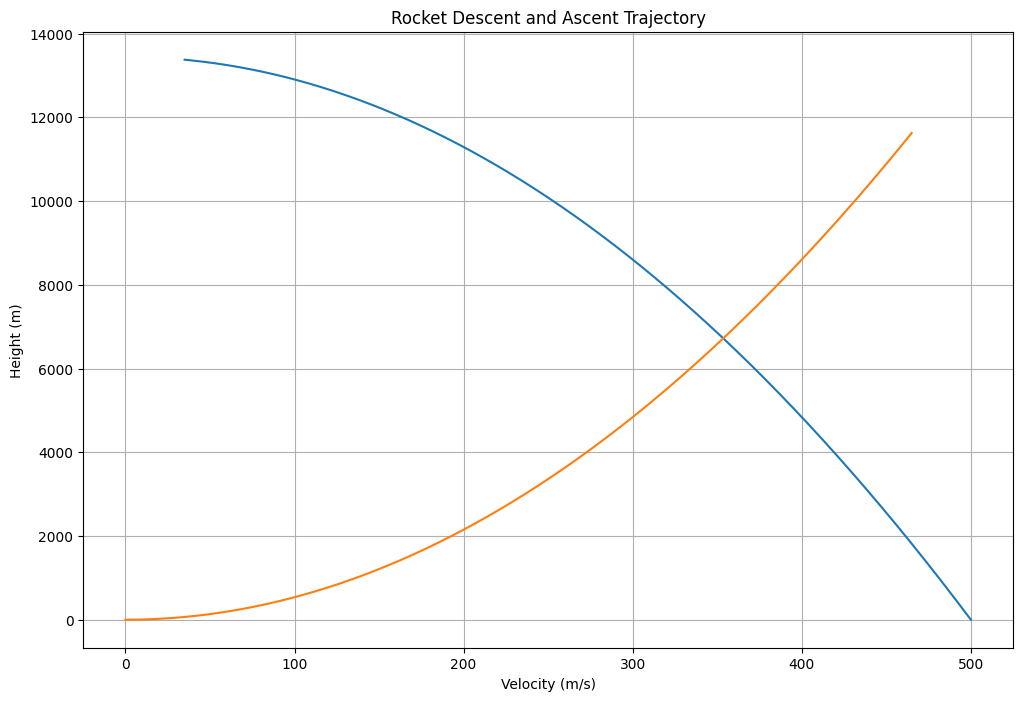

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rocket_equations(t, y, T):
    m = y[2]  # mass is the third element of the state vector
    g = 9.8  # acceleration due to gravity

    # ODEs
    dvdt = T / m - g
    dhdt = y[0]  # velocity is the first element of the state vector
    dmdt = 0.0  # mass doesn't change during descent

    return [dvdt, dhdt, dmdt]

# Initial conditions
initial_mass = 1000.0  # initial mass of the rocket (including fuel)
initial_state = [500.0, 0.0, initial_mass]  # initial velocity, height, and mass
# Define thrust as a function of time during descent
def thrust_function(t):
    return 500.0  # constant thrust during descent

# Time span for integration
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODEs
solution = solve_ivp(
    fun=lambda t, y: rocket_equations(t, y, thrust_function(t)),
    t_span=t_span,
    y0=initial_state,
    t_eval=t_eval,
    method='RK45'
)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(solution.y[0], solution.y[1])  # velocity vs height
plt.plot(np.abs(solution_ascent.y[0]), solution_ascent.y[1])
plt.title('Rocket Descent and Ascent Trajectory')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

###The intersection point of ascent and descent is at height 7000 m and velocity 350 m/s